In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   2   2 ...   0   0   0]
 ...
 [  0   0   0 ... 166  21 110]
 [  0   0   0 ...  15  57  68]
 [  0   0   0 ...  25  53  75]]


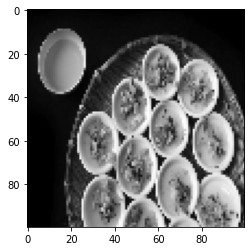

In [ ]:
datadir = "/content/drive/MyDrive/VNeseFood/10loaimonanVN"
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 564/564 [00:07<00:00, 74.19it/s]

6803


In [ ]:
#saving (x:picture), (y:label)
X=[]
y=[]
for features, label in training_data :
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('X',X.shape)
print('y',y.shape)

X (6803, 100, 100, 1)
y (6803,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/VNeseFood/save/X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/VNeseFood/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in = open("/content/drive/MyDrive/VNeseFood/save/X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/VNeseFood/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (6803, 100, 100, 1)
y (6803,)


In [ ]:
y= to_categorical(y,10)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/30
86/86 [==============================] - 9s 65ms/step - loss: 2.2172 - accuracy: 0.1828 - val_loss: 7.3356 - val_accuracy: 0.0037
Epoch 2/30
86/86 [==============================] - 5s 58ms/step - loss: 1.9681 - accuracy: 0.2247 - val_loss: 9.4742 - val_accuracy: 0.0000e+00
Epoch 3/30
86/86 [==============================] - 5s 58ms/step - loss: 1.8352 - accuracy: 0.3089 - val_loss: 12.9295 - val_accuracy: 0.0037
Epoch 4/30
86/86 [==============================] - 5s 58ms/step - loss: 1.6213 - accuracy: 0.3958 - val_loss: 10.4073 - val_accuracy: 0.0154
Epoch 5/30
86/86 [==============================] - 5s 58ms/step - loss: 1.5091 - accuracy: 0.4471 - val_loss: 12.2904 - val_accuracy: 0.0066
Epoch 6/30
86/86 [==============================] - 5s 59ms/step - loss: 1.3135 - accuracy: 0.5222 - val_loss: 10.9951 - val_accuracy: 0.0022
Epoch 7/30
86/86 [==============================] - 5s 59ms/step - loss: 1.0706 - accuracy: 0.6125 - val_loss: 15.0440 - val_accuracy: 0.0125
Epoc

In [ ]:
model.save('VNeseFood.h5')

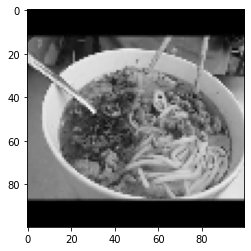

In [ ]:
img_test='/content/drive/MyDrive/VNeseFood/10loaimonanVN/bun bo hue/104.jpg'
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

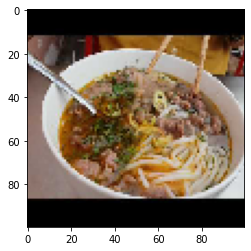

Prediction value bun bo hue


In [ ]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation bun rieu


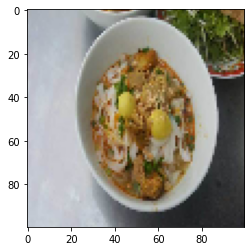

In [ ]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh bao',
          1: 'banh trang nuong', 
          2: 'bun bo hue',   
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('VNeseFood.h5')
	# load model
img = load_image('/content/drive/MyDrive/VNeseFood/10loaimonanVN/my quang/4.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation com tam


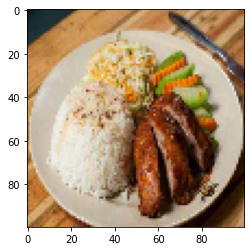

In [ ]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh bao',
          1: 'banh trang nuong', 
          2: 'bun bo hue',   
          3: 'bun dau mam tom',
          4: 'bun rieu',
          5: 'chao long',
          6: 'com tam',
          7: 'hu tieu',
          8: 'my quang',
          9: 'pho',
          }
model = load_model('VNeseFood.h5')
	# load model
img = load_image('/content/drive/MyDrive/VNeseFood/10loaimonanVN/com tam/121.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 